# Projeto de Eficiência Energética - UCI Energy Efficiency Dataset

# **Plano para AT2 - Modelagem e Avaliação de Algoritmos**

**por Tiago Dutra Galvão**

# **4. Visualização e Análise dos Modelos**

**Vamos analisar em detalhes os modelos:**

Dados carregados com sucesso.
Dimensões do X_train: (537, 14)
Dimensões do X_test: (231, 14)
Carregados resultados de 14 modelos base
Carregados resultados de 6 modelos otimizados
Total de 20 modelos avaliados
Melhor modelo para Heating Load: 'XGBoost_otimizado' (R² = 0.9986)
Melhor modelo para Cooling Load: 'XGBoost_otimizado' (R² = 0.9891)
Verificando arquivo: ../../models/XGBoost_otimizado_Heating_Load.pkl
Arquivo existe: ../../models/XGBoost_otimizado_Heating_Load.pkl
Verificando arquivo: ../../models/XGBoost_otimizado_Cooling_Load.pkl
Arquivo existe: ../../models/XGBoost_otimizado_Cooling_Load.pkl

Modelos carregados com sucesso:
Melhor modelo para Heating Load: XGBoost_otimizado
Melhor modelo para Cooling Load: XGBoost_otimizado
Features utilizadas: ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area', 'Orientation_Norte', 'Orientation_Oeste', 'Orientation_Sul', 'Glazing_Area_Distribution_Norte', 'Glazing_Area_Distribution_Oeste', 'G

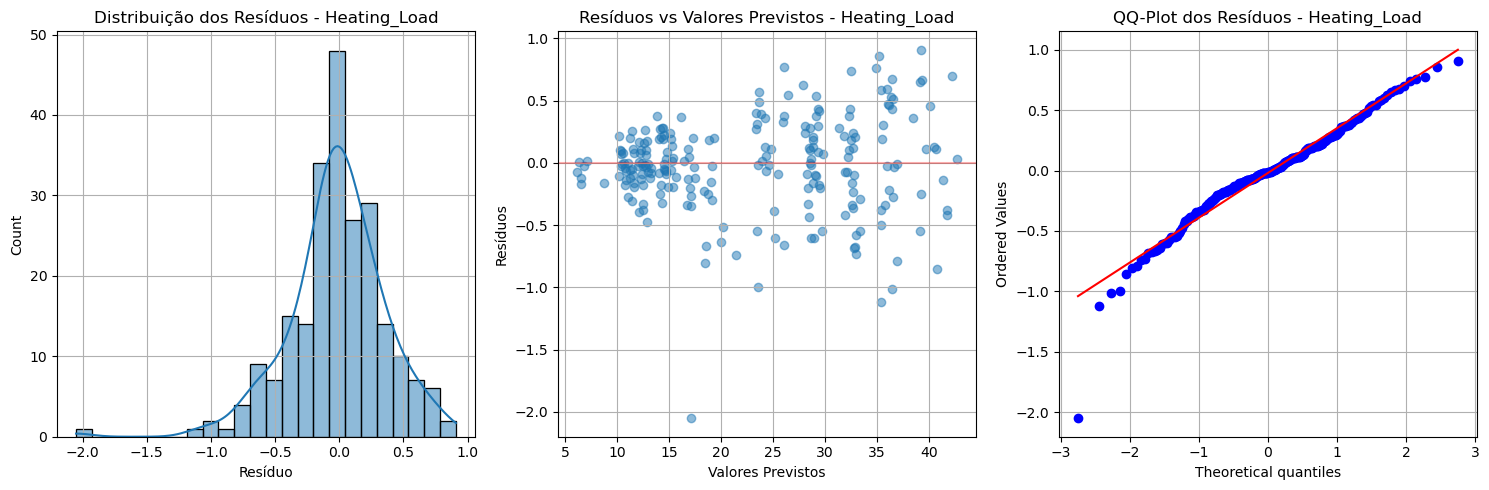

Estatísticas dos resíduos para Heating_Load:
Média: -0.0196
Desvio Padrão: 0.3764
RMSE: 0.3769

Análise de resíduos para o melhor modelo de Cooling Load:


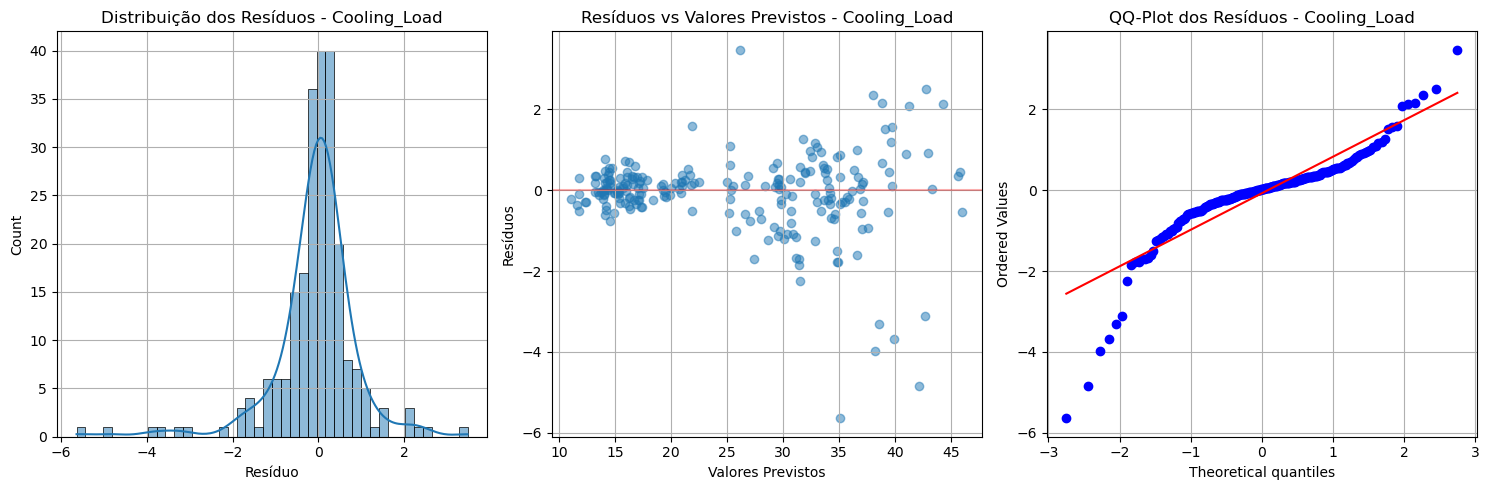

Estatísticas dos resíduos para Cooling_Load:
Média: -0.0731
Desvio Padrão: 0.9894
RMSE: 0.9921

Analisando importância das features para Heating Load...


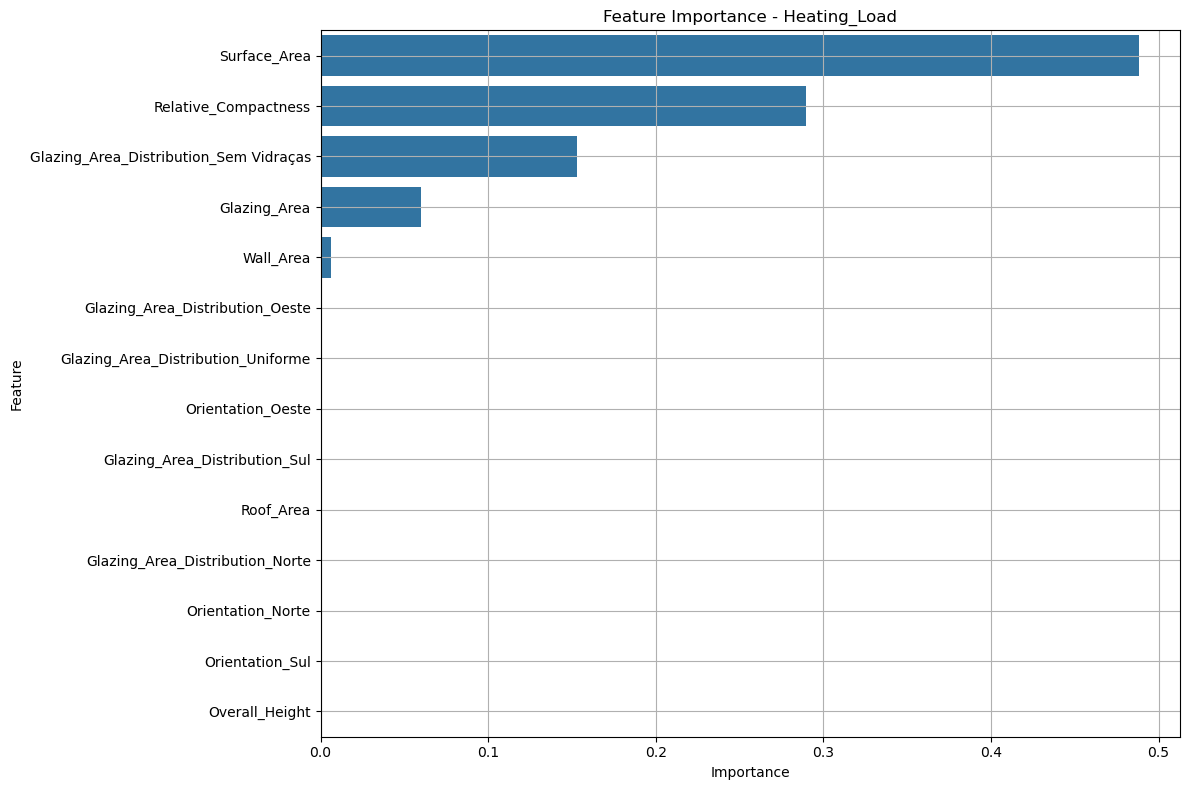

Top 10 features para Heating Load:


,Feature,Importance
1,Surface_Area,0.488353
0,Relative_Compactness,0.289341
11,Glazing_Area_Distribution_Sem Vidraças,0.152965
5,Glazing_Area,0.060084
2,Wall_Area,0.006405
10,Glazing_Area_Distribution_Oeste,0.000500
13,Glazing_Area_Distribution_Uniforme,0.000430
7,Orientation_Oeste,0.000396
12,Glazing_Area_Distribution_Sul,0.000392
3,Roof_Area,0.000342



Analisando importância das features para Cooling Load...


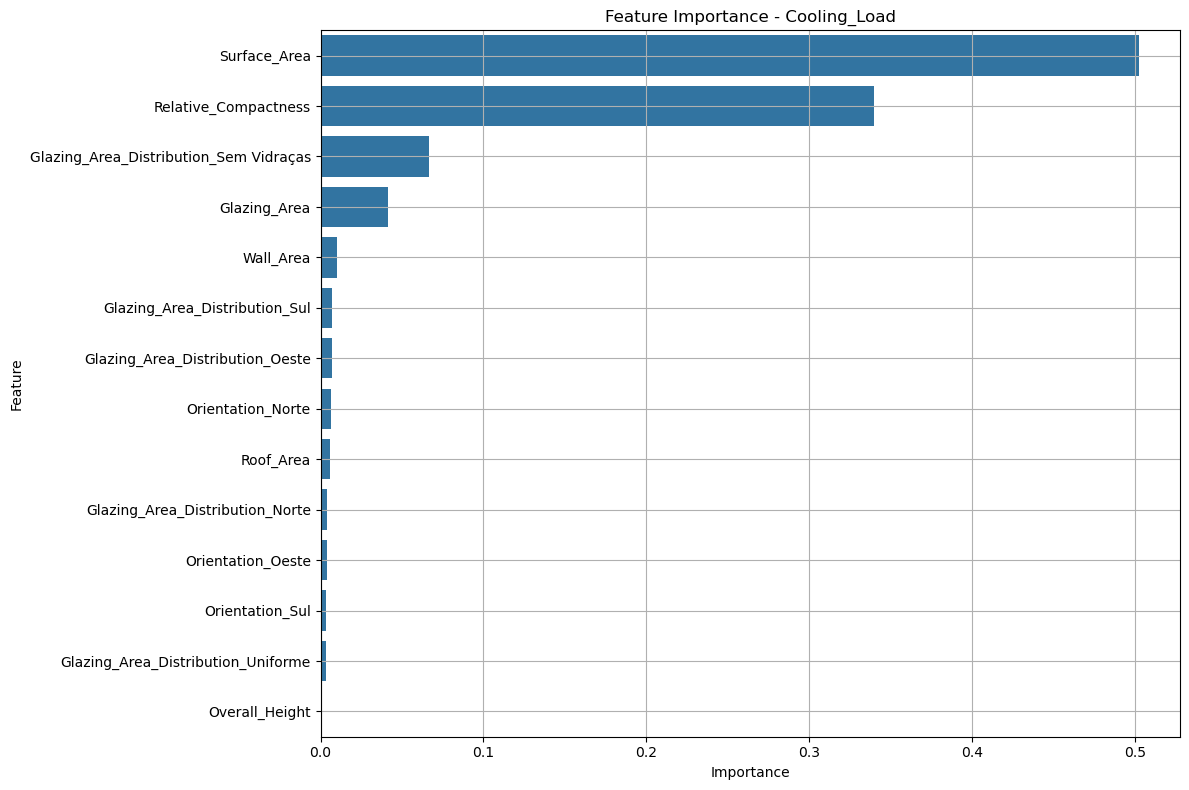

Top 10 features para Cooling Load:


,Feature,Importance
1,Surface_Area,0.502359
0,Relative_Compactness,0.339390
11,Glazing_Area_Distribution_Sem Vidraças,0.066286
5,Glazing_Area,0.041117
2,Wall_Area,0.010039
12,Glazing_Area_Distribution_Sul,0.007031
10,Glazing_Area_Distribution_Oeste,0.006750
6,Orientation_Norte,0.006320
3,Roof_Area,0.006018
9,Glazing_Area_Distribution_Norte,0.004216



Análise de previsões vs valores reais para Heating Load:


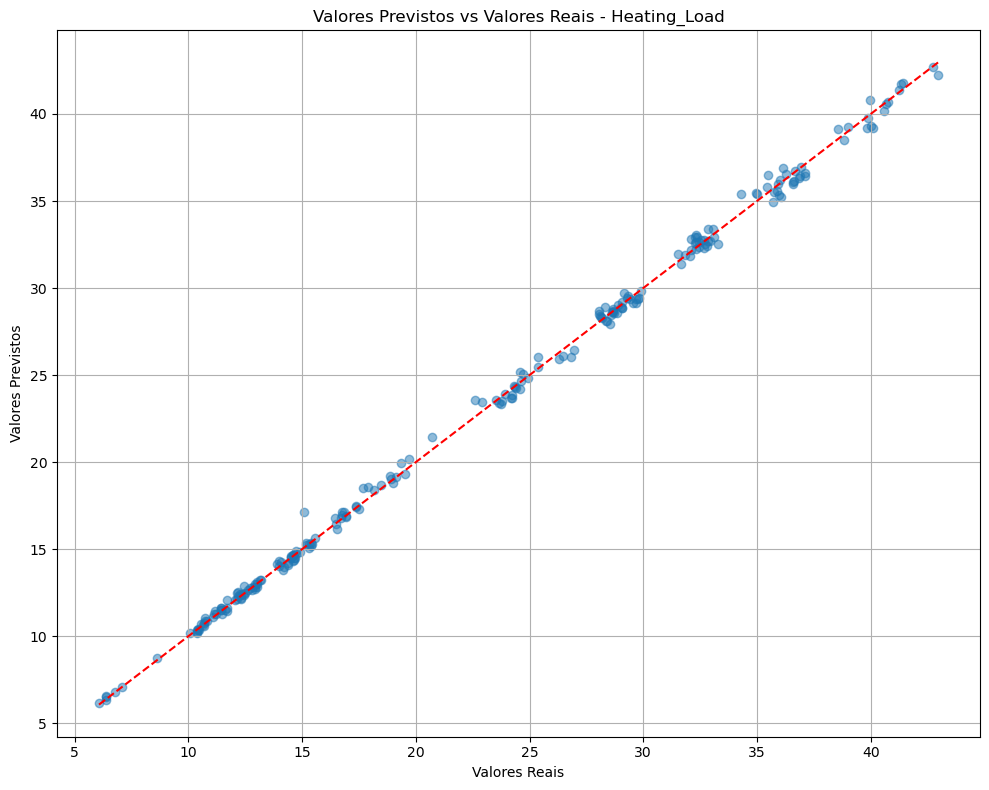

R² para Heating_Load: 0.9986

Análise de previsões vs valores reais para Cooling Load:


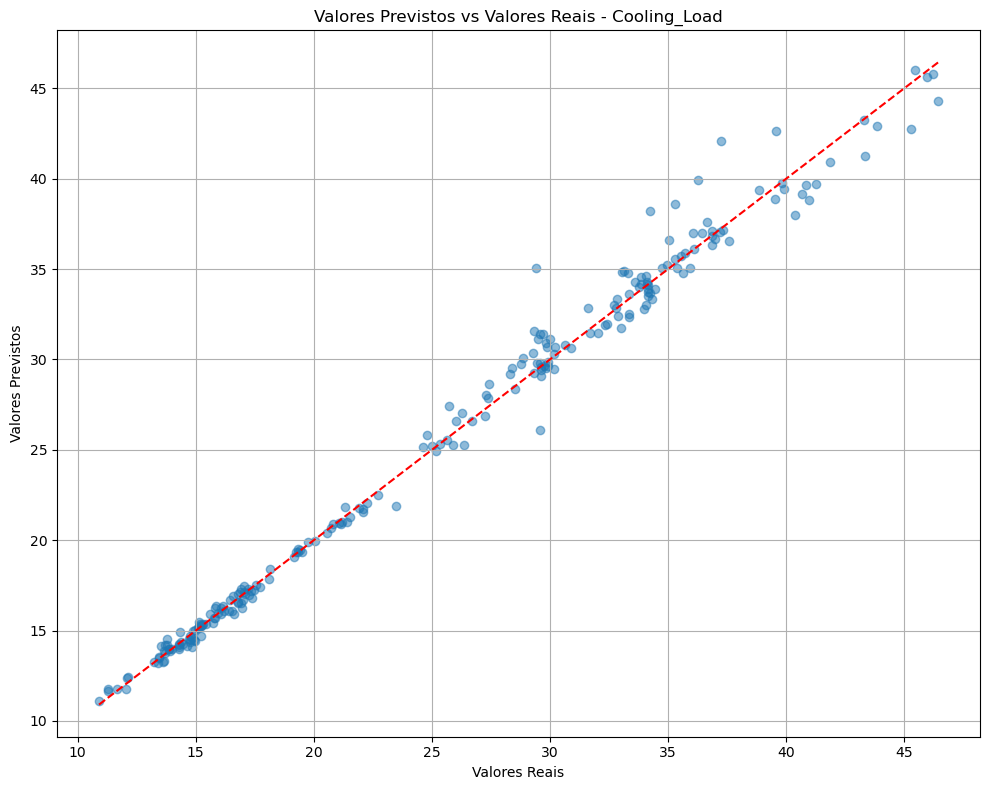

R² para Cooling_Load: 0.9891

Realizando análise SHAP...
Calculando valores SHAP para Heating Load...
Calculando valores SHAP para Cooling Load...
Gerando gráficos SHAP...


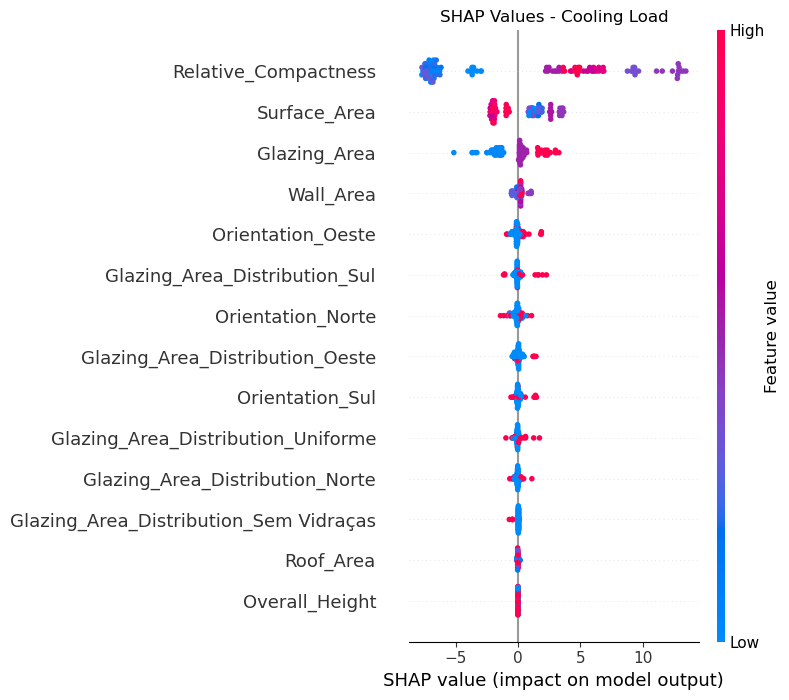


Comparação de desempenho entre modelos:


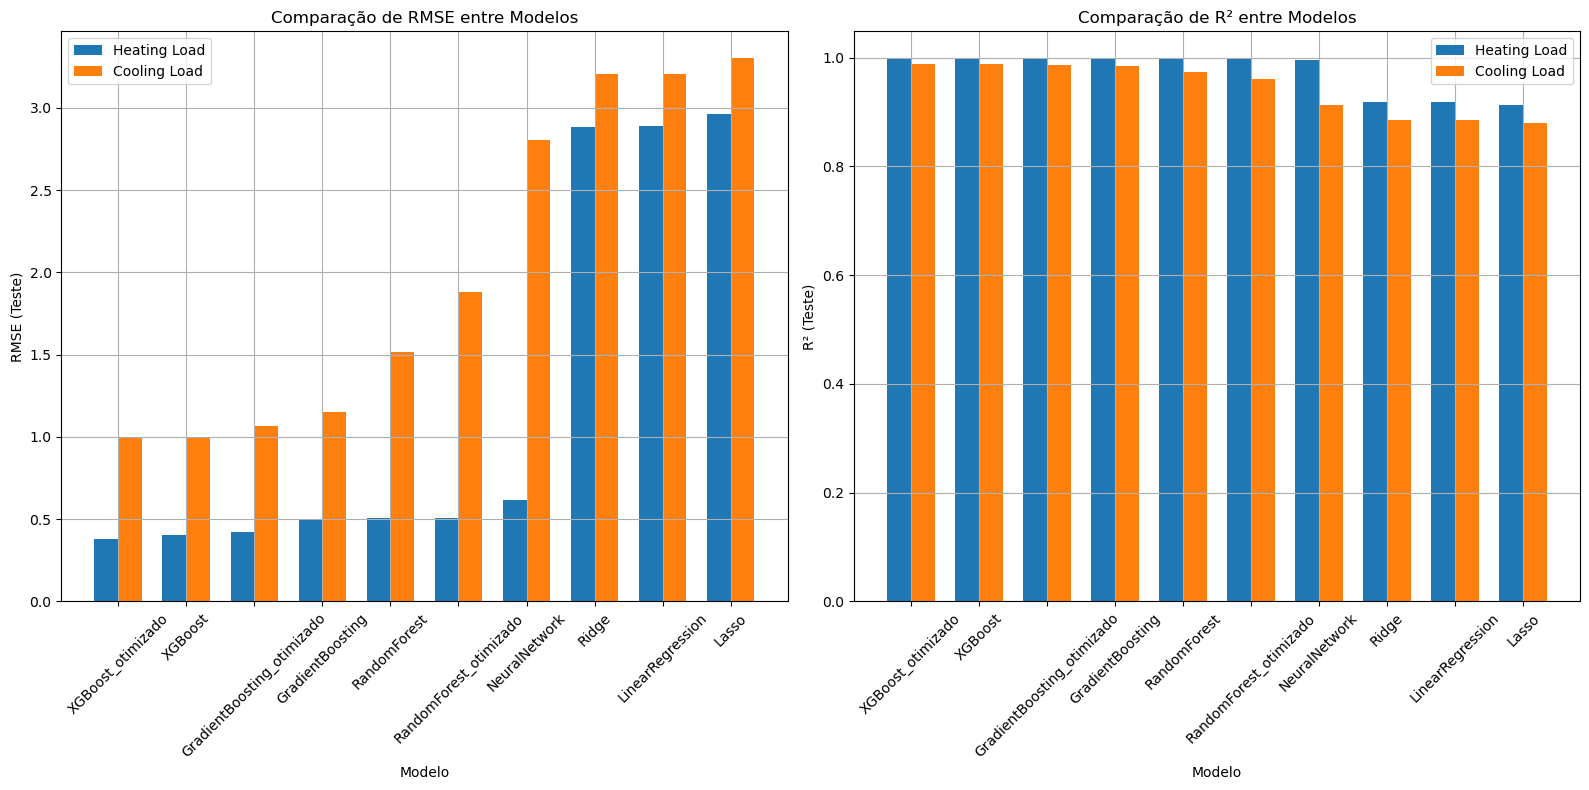


===== CONCLUSÃO - MELHORES MODELOS =====

Melhor modelo para Heating Load:


,Modelo,RMSE_Test,MAE_Test,R2_Test
14,XGBoost_otimizado,0.376933,0.273204,0.998599



Melhor modelo para Cooling Load:


,Modelo,RMSE_Test,MAE_Test,R2_Test
18,XGBoost_otimizado,0.992106,0.593017,0.98908



Análise de desempenho por categorias:

Desempenho por categoria em Orientation:


,Categoria,RMSE_Heating,RMSE_Cooling,Count
0,Leste,0.370229,0.643814,58
1,Sul,0.405607,1.217074,58
2,Oeste,0.386590,1.034331,58
3,Norte,0.341820,0.985527,57


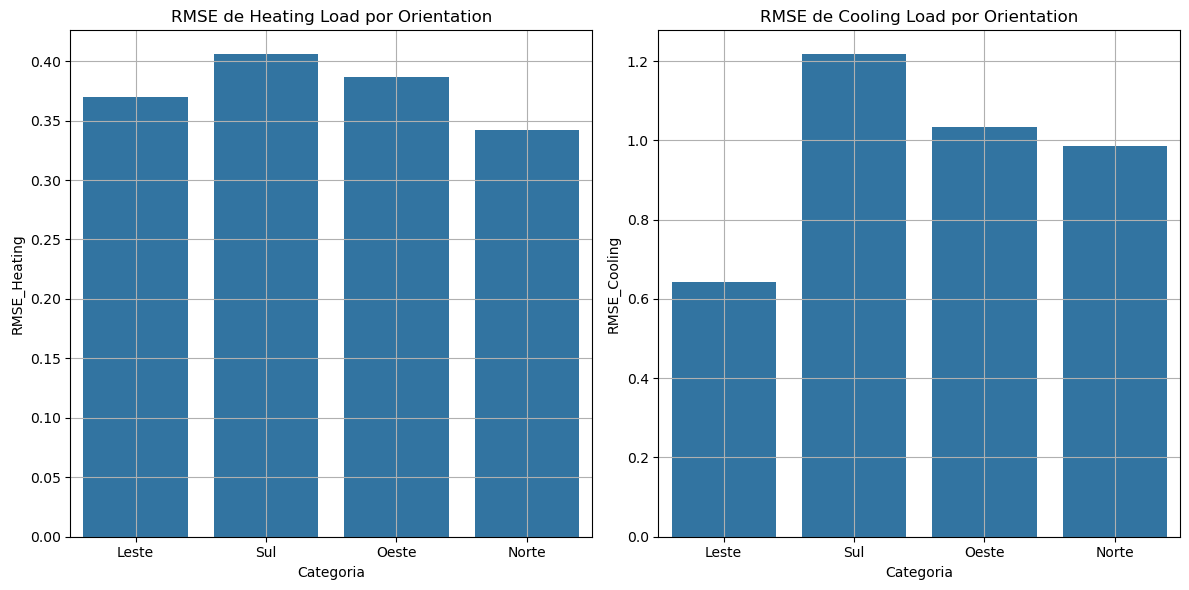


Desempenho por categoria em Glazing_Area_Distribution:


,Categoria,RMSE_Heating,RMSE_Cooling,Count
0,Uniforme,0.355036,0.885155,39
1,Norte,0.318145,1.266296,48
2,Leste,0.406820,1.138323,48
3,Sul,0.333825,0.916178,48
4,Oeste,0.450754,0.601294,48


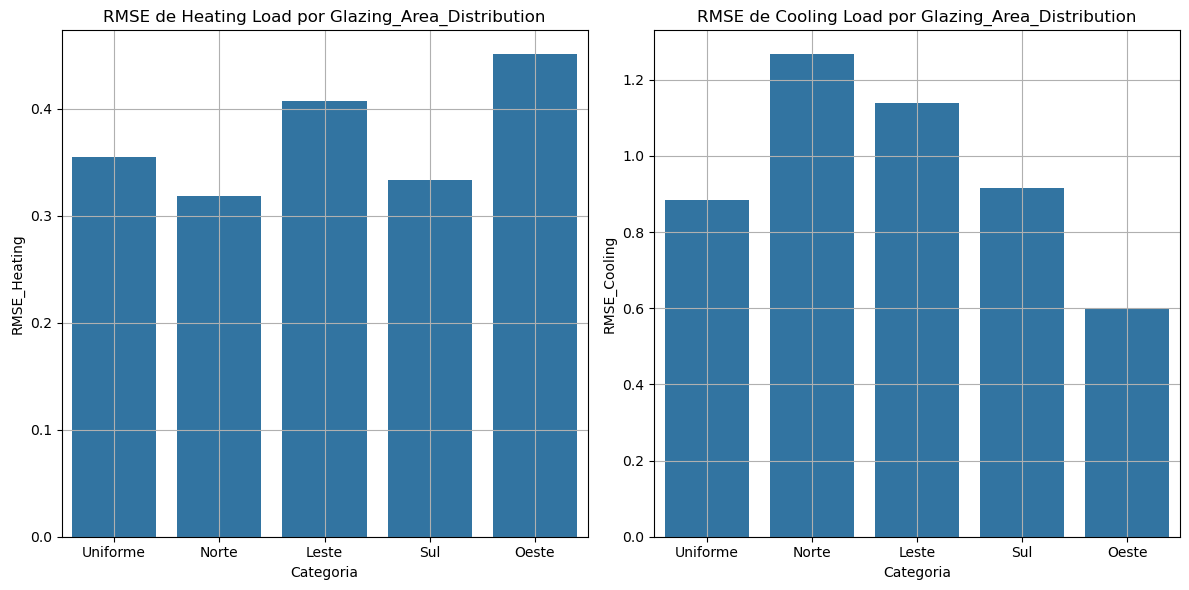


Salvando os melhores modelos finais...
Informações dos melhores modelos salvas em 'models/best_models_info.json'
Modelo para Heating Load copiado para 'models/best_heating_model.pkl'
Modelo para Cooling Load copiado para 'models/best_cooling_model.pkl'

Modelos finais preparados para uso na aplicação Django (AT3).


In [1]:
# Notebook: at2_modelagem/04_analise_modelos.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import joblib
import shap
import os
from sklearn.dummy import DummyRegressor

# Carregar os dados pré-processados
X_train = np.load('../../data/processed/X_train_preprocessed.npy')
X_test = np.load('../../data/processed/X_test_preprocessed.npy')
y_heating_train = np.load('../../data/processed/y_heating_train.npy')
y_heating_test = np.load('../../data/processed/y_heating_test.npy')
y_cooling_train = np.load('../../data/processed/y_cooling_train.npy')
y_cooling_test = np.load('../../data/processed/y_cooling_test.npy')

print("Dados carregados com sucesso.")
print(f"Dimensões do X_train: {X_train.shape}")
print(f"Dimensões do X_test: {X_test.shape}")

# Melhorar o código para encontrar automaticamente o melhor modelo

# Verificar se os arquivos de resultados existem
results_path = '../../reports/resultados_modelos.csv'
results_opt_path = '../../reports/resultados_modelos_otimizados.csv'

# Carregar resultados dos modelos base
if os.path.exists(results_path):
    df_resultados = pd.read_csv(results_path)
    print(f"Carregados resultados de {len(df_resultados)} modelos base")
else:
    print(f"Arquivo não encontrado: {results_path}")
    df_resultados = pd.DataFrame(columns=['Modelo', 'Target', 'RMSE_Test', 'MAE_Test', 'R2_Test'])

# Carregar resultados dos modelos otimizados
if os.path.exists(results_opt_path):
    df_resultados_otimizados = pd.read_csv(results_opt_path)
    print(f"Carregados resultados de {len(df_resultados_otimizados)} modelos otimizados")
else:
    print(f"Arquivo não encontrado: {results_opt_path}")
    df_resultados_otimizados = pd.DataFrame(columns=['Modelo', 'Target', 'RMSE_Test', 'MAE_Test', 'R2_Test'])

# Combinar todos os resultados
todos_resultados = pd.concat([df_resultados, df_resultados_otimizados], ignore_index=True)
print(f"Total de {len(todos_resultados)} modelos avaliados")

# Encontrar o melhor modelo para Heating Load
df_heating = todos_resultados[todos_resultados['Target'] == 'Heating_Load']
if not df_heating.empty:
    # Obter o índice da linha com o maior valor de R2_Test
    best_heating_idx = df_heating['R2_Test'].idxmax()
    melhor_modelo_heating_nome = df_heating.loc[best_heating_idx, 'Modelo']
    # Garantir que é uma string
    melhor_modelo_heating_nome = str(melhor_modelo_heating_nome).strip()
    print(f"Melhor modelo para Heating Load: '{melhor_modelo_heating_nome}' (R² = {df_heating.loc[best_heating_idx, 'R2_Test']:.4f})")
else:
    # Definir um modelo padrão se não houver resultados
    melhor_modelo_heating_nome = "XGBoost_otimizado"
    print(f"Nenhum resultado encontrado para Heating Load. Usando modelo padrão: {melhor_modelo_heating_nome}")

# Encontrar o melhor modelo para Cooling Load
df_cooling = todos_resultados[todos_resultados['Target'] == 'Cooling_Load']
if not df_cooling.empty:
    # Obter o índice da linha com o maior valor de R2_Test
    best_cooling_idx = df_cooling['R2_Test'].idxmax()
    melhor_modelo_cooling_nome = df_cooling.loc[best_cooling_idx, 'Modelo']
    # Garantir que é uma string
    melhor_modelo_cooling_nome = str(melhor_modelo_cooling_nome).strip()
    print(f"Melhor modelo para Cooling Load: '{melhor_modelo_cooling_nome}' (R² = {df_cooling.loc[best_cooling_idx, 'R2_Test']:.4f})")
else:
    # Definir um modelo padrão se não houver resultados
    melhor_modelo_cooling_nome = "XGBoost_otimizado"
    print(f"Nenhum resultado encontrado para Cooling Load. Usando modelo padrão: {melhor_modelo_cooling_nome}")

# Verificar se os arquivos dos modelos existem
heating_model_path = f'../../models/{melhor_modelo_heating_nome}_Heating_Load.pkl'
cooling_model_path = f'../../models/{melhor_modelo_cooling_nome}_Cooling_Load.pkl'

print(f"Verificando arquivo: {heating_model_path}")
if os.path.exists(heating_model_path):
    print(f"Arquivo existe: {heating_model_path}")
    melhor_modelo_heating = joblib.load(heating_model_path)
else:
    print(f"Arquivo não existe: {heating_model_path}")
    # Listar os modelos disponíveis
    modelos_disponiveis = [f for f in os.listdir('../../models/') if f.endswith('_Heating_Load.pkl')]
    print(f"Modelos disponíveis para Heating Load: {modelos_disponiveis}")
    
    # Usar o primeiro modelo disponível
    if modelos_disponiveis:
        alt_model_path = os.path.join('../../models/', modelos_disponiveis[0])
        melhor_modelo_heating_nome = modelos_disponiveis[0].replace('_Heating_Load.pkl', '')
        print(f"Usando modelo alternativo: {melhor_modelo_heating_nome}")
        melhor_modelo_heating = joblib.load(alt_model_path)
    else:
        print("Nenhum modelo para Heating Load encontrado.")
        # Criar um modelo dummy
        melhor_modelo_heating = DummyRegressor()
        melhor_modelo_heating.fit(X_train, y_heating_train)

print(f"Verificando arquivo: {cooling_model_path}")
if os.path.exists(cooling_model_path):
    print(f"Arquivo existe: {cooling_model_path}")
    melhor_modelo_cooling = joblib.load(cooling_model_path)
else:
    print(f"Arquivo não existe: {cooling_model_path}")
    # Listar os modelos disponíveis
    modelos_disponiveis = [f for f in os.listdir('../../models/') if f.endswith('_Cooling_Load.pkl')]
    print(f"Modelos disponíveis para Cooling Load: {modelos_disponiveis}")
    
    # Usar o primeiro modelo disponível
    if modelos_disponiveis:
        alt_model_path = os.path.join('../../models/', modelos_disponiveis[0])
        melhor_modelo_cooling_nome = modelos_disponiveis[0].replace('_Cooling_Load.pkl', '')
        print(f"Usando modelo alternativo: {melhor_modelo_cooling_nome}")
        melhor_modelo_cooling = joblib.load(alt_model_path)
    else:
        print("Nenhum modelo para Cooling Load encontrado.")
        # Criar um modelo dummy
        melhor_modelo_cooling = DummyRegressor()
        melhor_modelo_cooling.fit(X_train, y_cooling_train)

print("\nModelos carregados com sucesso:")
print(f"Melhor modelo para Heating Load: {melhor_modelo_heating_nome}")
print(f"Melhor modelo para Cooling Load: {melhor_modelo_cooling_nome}")

# Carregar o preprocessador para obter os nomes das features
preprocessor = joblib.load('../../models/preprocessor.pkl')

# Tentar obter os nomes das colunas transformadas
try:
    # Obter nomes das features
    categorical_cols = preprocessor.transformers_[1][2]  # Colunas categóricas
    numerical_cols = preprocessor.transformers_[0][2]    # Colunas numéricas
    
    # Obter os nomes das features transformadas
    ohe = preprocessor.named_transformers_['cat']
    cat_features = ohe.get_feature_names_out(categorical_cols)
    feature_names = list(numerical_cols) + list(cat_features)
except Exception as e:
    print(f"Erro ao obter nomes das features: {e}")
    # Criar nomes genéricos para as features
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

print(f"Features utilizadas: {feature_names}")

# Análise de Resíduos
def analisar_residuos(modelo, X, y, target_name):
    y_pred = modelo.predict(X)
    residuos = y - y_pred
    
    plt.figure(figsize=(15, 5))
    
    # Histograma dos resíduos
    plt.subplot(1, 3, 1)
    sns.histplot(residuos, kde=True)
    plt.title(f'Distribuição dos Resíduos - {target_name}')
    plt.xlabel('Resíduo')
    plt.grid(True)
    
    # Resíduos vs Valores Previstos
    plt.subplot(1, 3, 2)
    plt.scatter(y_pred, residuos, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.title(f'Resíduos vs Valores Previstos - {target_name}')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Resíduos')
    plt.grid(True)
    
    # QQ-plot
    plt.subplot(1, 3, 3)
    from scipy import stats
    stats.probplot(residuos, dist="norm", plot=plt)
    plt.title(f'QQ-Plot dos Resíduos - {target_name}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'../../reports/figures/residuos_{target_name}.png')
    plt.show()
    
    # Estatísticas dos resíduos
    mean_residuo = np.mean(residuos)
    std_residuo = np.std(residuos)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print(f"Estatísticas dos resíduos para {target_name}:")
    print(f"Média: {mean_residuo:.4f}")
    print(f"Desvio Padrão: {std_residuo:.4f}")
    print(f"RMSE: {rmse:.4f}")
    
    return residuos

# Analisar resíduos para os melhores modelos
print("\nAnálise de resíduos para o melhor modelo de Heating Load:")
residuos_heating = analisar_residuos(melhor_modelo_heating, X_test, y_heating_test, "Heating_Load")

print("\nAnálise de resíduos para o melhor modelo de Cooling Load:")
residuos_cooling = analisar_residuos(melhor_modelo_cooling, X_test, y_cooling_test, "Cooling_Load")

# Importância das Features
def analisar_importancia_features(modelo, X, y, feature_names, target_name):
    # Existem diferentes métodos dependendo do tipo de modelo
    feature_importance = None
    
    if hasattr(modelo, 'feature_importances_'):
        # Para modelos baseados em árvores como Random Forest, Gradient Boosting, XGBoost
        feature_importance = modelo.feature_importances_
        importance_type = "Feature Importance"
    elif hasattr(modelo, 'coef_'):
        # Para modelos lineares como Linear Regression, Ridge, Lasso
        feature_importance = np.abs(modelo.coef_)
        importance_type = "Coeficientes Absolutos"
    else:
        # Usar permutation importance para outros modelos
        perm_importance = permutation_importance(modelo, X, y, n_repeats=10, random_state=42)
        feature_importance = perm_importance.importances_mean
        importance_type = "Permutation Importance"
    
    # Criar DataFrame com as importâncias
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    # Plotar
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
    plt.title(f'{importance_type} - {target_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'../../reports/figures/feature_importance_{target_name}.png')
    plt.show()
    
    return importance_df

# Analisar importância de features para os melhores modelos
# Verificar se o tamanho das features coincide
if len(feature_names) == X_train.shape[1]:
    print("\nAnalisando importância das features para Heating Load...")
    importance_heating = analisar_importancia_features(melhor_modelo_heating, X_test, y_heating_test, feature_names, "Heating_Load")
    print("Top 10 features para Heating Load:")
    display(importance_heating.head(10))
    
    print("\nAnalisando importância das features para Cooling Load...")
    importance_cooling = analisar_importancia_features(melhor_modelo_cooling, X_test, y_cooling_test, feature_names, "Cooling_Load")
    print("Top 10 features para Cooling Load:")
    display(importance_cooling.head(10))
else:
    print(f"Aviso: O número de nomes de features ({len(feature_names)}) não coincide com o número de colunas nos dados ({X_train.shape[1]})")
    print("A análise de importância de features será pulada.")

# Valores Previstos vs Valores Reais
def plot_previsoes_vs_reais(modelo, X_test, y_test, target_name):
    y_pred = modelo.predict(X_test)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    
    # Linha de referência (previsão perfeita)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    plt.title(f'Valores Previstos vs Valores Reais - {target_name}')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'../../reports/figures/previstos_vs_reais_{target_name}.png')
    plt.show()
    
    # Calcular o R²
    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(f"R² para {target_name}: {r2:.4f}")

# Plotar previsões vs valores reais
print("\nAnálise de previsões vs valores reais para Heating Load:")
plot_previsoes_vs_reais(melhor_modelo_heating, X_test, y_heating_test, "Heating_Load")

print("\nAnálise de previsões vs valores reais para Cooling Load:")
plot_previsoes_vs_reais(melhor_modelo_cooling, X_test, y_cooling_test, "Cooling_Load")

# Análise SHAP para interpretabilidade (se possível)
try:
    import shap
    print("\nRealizando análise SHAP...")
    
    # Criar um explainer SHAP adequado para o tipo de modelo
    if isinstance(melhor_modelo_heating, (RandomForestRegressor, GradientBoostingRegressor, XGBRegressor)):
        # Para modelos baseados em árvores
        explainer_heating = shap.TreeExplainer(melhor_modelo_heating)
        explainer_cooling = shap.TreeExplainer(melhor_modelo_cooling)
    else:
        # Para outros tipos de modelos
        explainer_heating = shap.KernelExplainer(melhor_modelo_heating.predict, shap.sample(X_train, 100))
        explainer_cooling = shap.KernelExplainer(melhor_modelo_cooling.predict, shap.sample(X_train, 100))
    
    # Calcular valores SHAP
    print("Calculando valores SHAP para Heating Load...")
    shap_values_heating = explainer_heating.shap_values(X_test[:100])
    
    print("Calculando valores SHAP para Cooling Load...")
    shap_values_cooling = explainer_cooling.shap_values(X_test[:100])
    
    # Resumo dos valores SHAP
    print("Gerando gráficos SHAP...")
    plt.figure(figsize=(12, 10))
    
    plt.subplot(1, 2, 1)
    shap.summary_plot(shap_values_heating, X_test[:100], feature_names=feature_names, show=False)
    plt.title('SHAP Values - Heating Load')
    
    plt.subplot(1, 2, 2)
    shap.summary_plot(shap_values_cooling, X_test[:100], feature_names=feature_names, show=False)
    plt.title('SHAP Values - Cooling Load')
    
    plt.tight_layout()
    plt.savefig('../../reports/figures/shap_summary.png')
    plt.show()
    
except Exception as e:
    print(f"Não foi possível realizar a análise SHAP: {e}")
    print("A análise SHAP será pulada.")

# Comparação de Erros entre Modelos
print("\nComparação de desempenho entre modelos:")
todos_resultados = pd.concat([df_resultados, df_resultados_otimizados])

# Filtrar para os melhores modelos de cada tipo
melhores_modelos = pd.DataFrame()
for modelo in todos_resultados['Modelo'].unique():
    for target in ['Heating_Load', 'Cooling_Load']:
        df_temp = todos_resultados[(todos_resultados['Modelo'] == modelo) & (todos_resultados['Target'] == target)]
        if not df_temp.empty:
            melhores_modelos = pd.concat([melhores_modelos, df_temp.loc[df_temp['R2_Test'].idxmax()].to_frame().T])

# Plotar comparação de RMSE e R² para os melhores modelos
plt.figure(figsize=(16, 8))

# RMSE
plt.subplot(1, 2, 1)
heating_models = melhores_modelos[melhores_modelos['Target'] == 'Heating_Load'].sort_values('RMSE_Test')
cooling_models = melhores_modelos[melhores_modelos['Target'] == 'Cooling_Load'].sort_values('RMSE_Test')

x = np.arange(len(heating_models))
width = 0.35

plt.bar(x - width/2, heating_models['RMSE_Test'], width, label='Heating Load')
plt.bar(x + width/2, cooling_models['RMSE_Test'], width, label='Cooling Load')

plt.xlabel('Modelo')
plt.ylabel('RMSE (Teste)')
plt.title('Comparação de RMSE entre Modelos')
plt.xticks(x, heating_models['Modelo'], rotation=45)
plt.legend()
plt.grid(True)

# R²
plt.subplot(1, 2, 2)
heating_models = melhores_modelos[melhores_modelos['Target'] == 'Heating_Load'].sort_values('R2_Test', ascending=False)
cooling_models = melhores_modelos[melhores_modelos['Target'] == 'Cooling_Load'].sort_values('R2_Test', ascending=False)

x = np.arange(len(heating_models))

plt.bar(x - width/2, heating_models['R2_Test'], width, label='Heating Load')
plt.bar(x + width/2, cooling_models['R2_Test'], width, label='Cooling Load')

plt.xlabel('Modelo')
plt.ylabel('R² (Teste)')
plt.title('Comparação de R² entre Modelos')
plt.xticks(x, heating_models['Modelo'], rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('../../reports/figures/comparacao_final_modelos.png')
plt.show()

# Conclusão - Melhores Modelos
print("\n===== CONCLUSÃO - MELHORES MODELOS =====")
print("\nMelhor modelo para Heating Load:")
display(df_heating.nlargest(1, 'R2_Test')[['Modelo', 'RMSE_Test', 'MAE_Test', 'R2_Test']])

print("\nMelhor modelo para Cooling Load:")
display(df_cooling.nlargest(1, 'R2_Test')[['Modelo', 'RMSE_Test', 'MAE_Test', 'R2_Test']])

# Métricas por categoria (se aplicável)
try:
    # Carregar os dados originais para obter as categorias
    df_original = pd.read_csv('../../data/processed/energy_efficiency_processed.csv')
    
    # Verificar se existem colunas categóricas
    categorical_cols = df_original.select_dtypes(include=['object', 'category']).columns.tolist()
    
    if len(categorical_cols) > 0:
        print("\nAnálise de desempenho por categorias:")
        
        # Pegar os índices do conjunto de teste
        X_df = pd.DataFrame(X_test)
        X_df['idx'] = range(len(X_train), len(X_train) + len(X_test))
        
        # Analisar desempenho por categorias
        for cat_col in categorical_cols:
            print(f"\nDesempenho por categoria em {cat_col}:")
            
            # Criar um DataFrame para análise
            df_analysis = pd.DataFrame({
                'Real_Heating': y_heating_test,
                'Pred_Heating': melhor_modelo_heating.predict(X_test),
                'Real_Cooling': y_cooling_test,
                'Pred_Cooling': melhor_modelo_cooling.predict(X_test),
                cat_col: df_original.iloc[X_df['idx'].values][cat_col].values
            })
            
            # Calcular métricas por categoria
            metrics_by_category = []
            for category in df_analysis[cat_col].unique():
                df_cat = df_analysis[df_analysis[cat_col] == category]
                
                rmse_heating = np.sqrt(mean_squared_error(df_cat['Real_Heating'], df_cat['Pred_Heating']))
                rmse_cooling = np.sqrt(mean_squared_error(df_cat['Real_Cooling'], df_cat['Pred_Cooling']))
                
                metrics_by_category.append({
                    'Categoria': category,
                    'RMSE_Heating': rmse_heating,
                    'RMSE_Cooling': rmse_cooling,
                    'Count': len(df_cat)
                })
            
            df_metrics = pd.DataFrame(metrics_by_category)
            display(df_metrics)
            
            # Plotar
            plt.figure(figsize=(12, 6))
            
            plt.subplot(1, 2, 1)
            sns.barplot(x='Categoria', y='RMSE_Heating', data=df_metrics)
            plt.title(f'RMSE de Heating Load por {cat_col}')
            plt.grid(True)
            
            plt.subplot(1, 2, 2)
            sns.barplot(x='Categoria', y='RMSE_Cooling', data=df_metrics)
            plt.title(f'RMSE de Cooling Load por {cat_col}')
            plt.grid(True)
            
            plt.tight_layout()
            plt.savefig(f'../../reports/figures/performance_by_{cat_col}.png')
            plt.show()
    else:
        print("\nNenhuma coluna categórica encontrada para análise por categorias.")
        
except Exception as e:
    print(f"\nErro na análise por categorias: {e}")
    print("A análise por categorias será pulada.")

# Salvar os melhores modelos finais
print("\nSalvando os melhores modelos finais...")

# Criar um dicionário com informações dos melhores modelos
best_models_info = {
    'heating_model': melhor_modelo_heating_nome,
    'cooling_model': melhor_modelo_cooling_nome,
    'preprocessor': 'preprocessor.pkl',
    'feature_names': feature_names,
    'heating_metrics': {
        'rmse': float(df_heating.nlargest(1, 'R2_Test')['RMSE_Test'].values[0]) if not df_heating.empty else float(0),
        'mae': float(df_heating.nlargest(1, 'R2_Test')['MAE_Test'].values[0]) if not df_heating.empty else float(0),
        'r2': float(df_heating.nlargest(1, 'R2_Test')['R2_Test'].values[0]) if not df_heating.empty else float(0)
    },
    'cooling_metrics': {
        'rmse': float(df_cooling.nlargest(1, 'R2_Test')['RMSE_Test'].values[0]) if not df_cooling.empty else float(0),
        'mae': float(df_cooling.nlargest(1, 'R2_Test')['MAE_Test'].values[0]) if not df_cooling.empty else float(0),
        'r2': float(df_cooling.nlargest(1, 'R2_Test')['R2_Test'].values[0]) if not df_cooling.empty else float(0)
    }
}

# Salvar as informações em formato JSON
import json
with open('../../models/best_models_info.json', 'w') as f:
    json.dump(best_models_info, f, indent=4)

print("Informações dos melhores modelos salvas em 'models/best_models_info.json'")

# Copiar os melhores modelos para um local específico
import shutil
try:
    shutil.copy(f'../../models/{melhor_modelo_heating_nome}_Heating_Load.pkl', 
                '../../models/best_heating_model.pkl')
    print("Modelo para Heating Load copiado para 'models/best_heating_model.pkl'")
except Exception as e:
    print(f"Erro ao copiar modelo para Heating Load: {e}")

try:
    shutil.copy(f'../../models/{melhor_modelo_cooling_nome}_Cooling_Load.pkl', 
                '../../models/best_cooling_model.pkl')
    print("Modelo para Cooling Load copiado para 'models/best_cooling_model.pkl'")
except Exception as e:
    print(f"Erro ao copiar modelo para Cooling Load: {e}")

print("\nModelos finais preparados para uso na aplicação Django (AT3).")